# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Packages for date conversions for calculating trip durations
from datetime import datetime

# Packages for OLS, MLR, confusion matrix
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm



/tmp/ipykernel_74336/726540403.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/home/luiz/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv", index_col=[0])

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


==> ENTER YOUR RESPONSE HERE 

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
df = df0.copy()
df.shape

(22699, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null  float64
 1

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [5]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [6]:
df.drop_duplicates()
df.shape

(22699, 17)

Use `.describe()`.

In [7]:
# Use .describe()
df.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [8]:
# Convert datetime columns to datetime
df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']] = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   passenger_count        22699 non-null  int64         
 4   trip_distance          22699 non-null  float64       
 5   RatecodeID             22699 non-null  int64         
 6   store_and_fwd_flag     22699 non-null  object        
 7   PULocationID           22699 non-null  int64         
 8   DOLocationID           22699 non-null  int64         
 9   payment_type           22699 non-null  int64         
 10  fare_amount            22699 non-null  float64       
 11  extra                  22699 non-null  float64       
 12  mta_tax                22699 non-null  float64       
 

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [9]:
# Create `duration` column
df.insert(df.columns.get_loc('tpep_dropoff_datetime')+1, 'duration', (df.tpep_dropoff_datetime-df.tpep_pickup_datetime)/np.timedelta64(1,'m'), allow_duplicates=False)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,duration,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,14.066667,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,26.500000,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,7.200000,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,30.250000,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,16.716667,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [10]:
### YOUR CODE HERE ###
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 22699 entries, 24870114 to 17208911
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   duration               22699 non-null  float64       
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

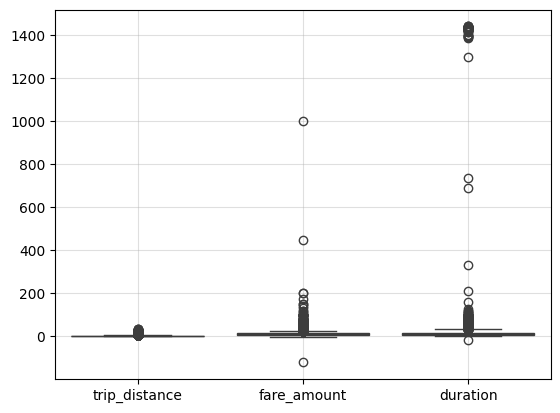

In [11]:
### YOUR CODE HERE ###
fig = sns.boxplot(df[['trip_distance', 'fare_amount', 'duration']], showfliers=True)
fig.grid(alpha = 0.4)


Creating a boxplot to each variable for better visualization:

Text(0.5, 0, 'Duration [m]')

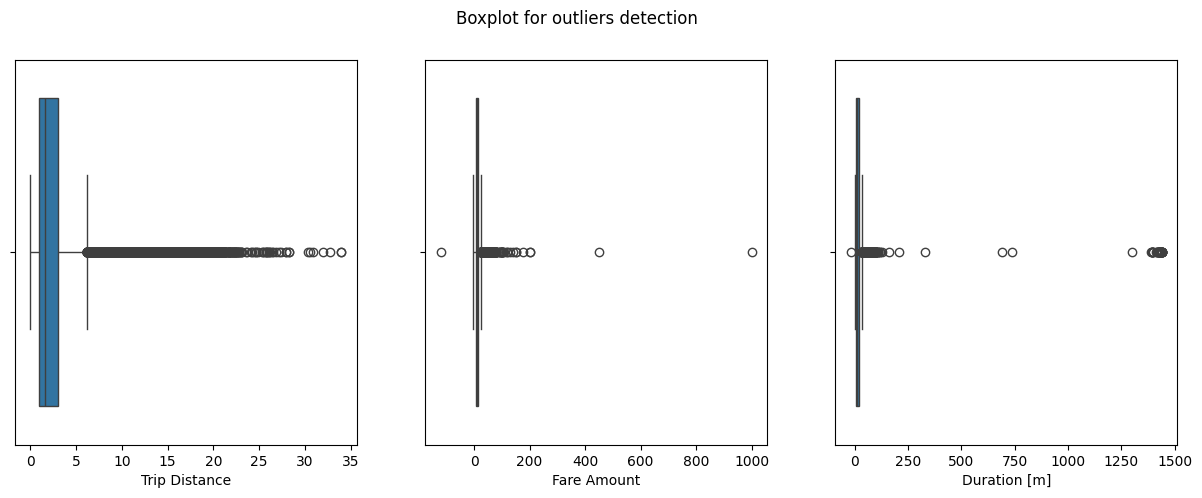

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Boxplot for outliers detection')
sns.boxplot(x=df.trip_distance, ax=axes[0])
axes[0].set_xlabel('Trip Distance')
sns.boxplot(x=df.fare_amount, ax=axes[1])
axes[1].set_xlabel('Fare Amount')
sns.boxplot(x=df.duration, ax=axes[2])
axes[2].set_xlabel('Duration [m]')

**Questions:** 
1. Which variable(s) contains outliers? 
    - All variables contain outlieres.

2. Are the values in the `trip_distance` column unbelievable?
    - There are a few trips with 35 miles, which can occur eventually.
    - Fare amount has a charge of US$ 1,000, which seems a little odd.
    - Duration has few values with trips taking over 21 hours (1250 minutes). Those seems to be problematic outliers. 

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?
    - There are disputed charges, which can explain negative fare amounts.
    - Duration has negative values, which is hard to explain.
    - Trip distances equals to zero have a fare amount different than 0, meaning that an analysis might give a wrong correlation between the values. 

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [13]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df.trip_distance))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

**My note** this hypothesis do not hold, since there are trips with 0 distance with 20 dolars fare amount. 

Calculate the count of rides where the `trip_distance` is zero.

In [14]:
sum(df.trip_distance == 0)

148

There are not enough trip_distances equals to zero to pose a problem to the dataset. 

148 out of ~23,000 rides is relatively insignificant. You could impute it with a value of 0.01, but it's unlikely to have much of an effect on the model. Therefore, the `trip_distance` column will remain untouched with regard to outliers.

#### `fare_amount` outliers

In [15]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?

There are negative fare amounts and extremally high fare amounts.
* **Low values:** Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled. Negative values can also represent disputed charges, so we should decide in either removing the data or taking the positive value of it. 

* **High values:** The maximum fare amount in this dataset is nearly \$1,000, which seems very unlikely. High values for this feature can be capped based on intuition and statistics. The interquartile range (IQR) is \$8. The standard formula of `Q3 + (1.5 * IQR)` yields $26.50. That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of `6`, which results in a cap of \$62.50.


Impute values less than $0 with `0`.

In [16]:
# Impute values less than $0 with 0
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].min()

0.0

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [17]:
def outlier_imputer(column_list, iqr_factor: float):
  '''
  Impute upper-limit values in specified columns based on their interquartile range.

  Arguments:
      column_list: A list of columns to iterate over
      iqr_factor: A number representing x in the formula:
                  Q3 + (x * IQR). Used to determine maximum threshold,
                  beyond which a point is considered an outlier.

  The IQR is computed for each column in column_list and values exceeding
  the upper threshold for each column are imputed with the upper threshold value.
  '''
  for col in column_list:
    # Reassigning minimum to zero
    df.loc[df[col] < 0, col] = 0

    # Calculate upper threshold
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_threshold = q3 + iqr_factor * iqr

    df.loc[df[col] > upper_threshold, col] = upper_threshold

In [18]:
outlier_imputer(['fare_amount'], 6)

#### `duration` outliers


In [19]:
# Call .describe() for duration outliers
df.duration.describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [20]:
# Impute a 0 for any negative values
df.loc[df.duration < 0, 'duration'] = 0

In [21]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [22]:
df.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,duration,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,14.066667,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,26.500000,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80


In [23]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df.PULocationID.astype(str) + ' ' + df.DOLocationID.astype(str)
df.pickup_dropoff.head()

24870114     100 231
35634249      186 43
106203690    262 236
38942136      188 97
30841670       4 112
Name: pickup_dropoff, dtype: object

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [24]:
grouped = df.groupby('pickup_dropoff')[['trip_distance']].mean(numeric_only=True)
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [25]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']
grouped_dict

{'1 1': 2.433333333333333,
 '10 148': 15.7,
 '100 1': 16.89,
 '100 100': 0.25333333333333335,
 '100 107': 1.18,
 '100 113': 2.024,
 '100 114': 1.94,
 '100 12': 4.55,
 '100 125': 2.84,
 '100 13': 4.201666666666667,
 '100 132': 17.2175,
 '100 137': 1.299,
 '100 138': 10.432857142857143,
 '100 140': 2.746,
 '100 141': 2.11,
 '100 142': 1.6958333333333335,
 '100 143': 1.5825,
 '100 144': 3.0066666666666664,
 '100 148': 4.1066666666666665,
 '100 151': 3.668,
 '100 152': 4.9,
 '100 158': 1.938,
 '100 161': 0.9813888888888889,
 '100 162': 1.2163636363636363,
 '100 163': 1.2656,
 '100 164': 0.841,
 '100 166': 5.199999999999999,
 '100 170': 0.8548,
 '100 177': 12.0,
 '100 181': 9.34,
 '100 186': 0.6404761904761904,
 '100 193': 4.39,
 '100 198': 9.01,
 '100 202': 5.3,
 '100 209': 4.43,
 '100 211': 2.48,
 '100 224': 1.9500000000000002,
 '100 225': 7.5,
 '100 229': 1.7850000000000001,
 '100 230': 0.72975,
 '100 231': 3.5216666666666665,
 '100 232': 3.8449999999999998,
 '100 233': 1.245833333333333

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [26]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df.insert(df.columns.get_loc('trip_distance')+1, 'mean_distance', df['pickup_dropoff'], allow_duplicates=False)

# 2. Map `grouped_dict` to the `mean_distance` column
df.mean_distance = df.mean_distance.map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]


,mean_distance
24870114,3.521667
96629892,3.521667
48945131,3.521667
50574134,3.521667
7282051,3.521667
49385419,3.521667


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [27]:
grouped = df.groupby('pickup_dropoff')[['duration']].mean(numeric_only=True)
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df.insert(df.columns.get_loc('duration')+1, 'mean_duration', df['pickup_dropoff'], allow_duplicates=False)

df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
24870114,22.847222
96629892,22.847222
48945131,22.847222
50574134,22.847222
7282051,22.847222
49385419,22.847222


In [28]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,duration,mean_duration,passenger_count,trip_distance,mean_distance,RatecodeID,store_and_fwd_flag,...,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_dropoff
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,14.066667,22.847222,6,3.34,3.521667,1,N,...,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,100 231
35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,26.500000,24.470370,1,1.80,3.108889,1,N,...,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,186 43
106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,7.200000,7.250000,1,1.00,0.881429,1,N,...,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,262 236
38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,30.250000,30.250000,1,3.70,3.700000,1,N,...,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,188 97
30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,16.716667,14.616667,1,4.37,4.435000,1,N,...,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,4 112


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [29]:
# Create 'day' col
df.insert(df.columns.get_loc('tpep_dropoff_datetime')+1, 'day', df['tpep_pickup_datetime'].dt.day_name().str.lower(), allow_duplicates=False)


In [30]:
# Create 'month' col
df.insert(df.columns.get_loc('day')+1, 'month', df['tpep_pickup_datetime'].dt.month_name().str.slice(stop=3), allow_duplicates=False)

In [31]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,day,month,duration,mean_duration,passenger_count,trip_distance,mean_distance,...,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_dropoff
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,saturday,Mar,14.066667,22.847222,6,3.34,3.521667,...,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,100 231
35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,tuesday,Apr,26.500000,24.470370,1,1.80,3.108889,...,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,186 43
106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,friday,Dec,7.200000,7.250000,1,1.00,0.881429,...,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,262 236
38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,sunday,May,30.250000,30.250000,1,3.70,3.700000,...,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,188 97
30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,saturday,Apr,16.716667,14.616667,1,4.37,4.435000,...,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,4 112


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [32]:
# Create 'rush_hour' col
df.insert(df.columns.get_loc('tpep_dropoff_datetime')+1, 'rush_hour', df['tpep_pickup_datetime'].dt.hour, allow_duplicates=False)

In [33]:
# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df.day.isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [34]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [35]:
# Apply the `rush_hourizer()` function to the new column
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

/tmp/ipykernel_74336/3278249955.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0 1 1 ... 1 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis=1)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,rush_hour,day,month,duration,mean_duration,passenger_count,trip_distance,...,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_dropoff
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,0,saturday,Mar,14.066667,22.847222,6,3.34,...,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,100 231
35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,0,tuesday,Apr,26.500000,24.470370,1,1.80,...,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,186 43
106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,friday,Dec,7.200000,7.250000,1,1.00,...,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,262 236
38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,0,sunday,May,30.250000,30.250000,1,3.70,...,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,188 97
30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,0,saturday,Apr,16.716667,14.616667,1,4.37,...,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,4 112


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

Text(0, 0.5, 'Fare Amount [US$]')

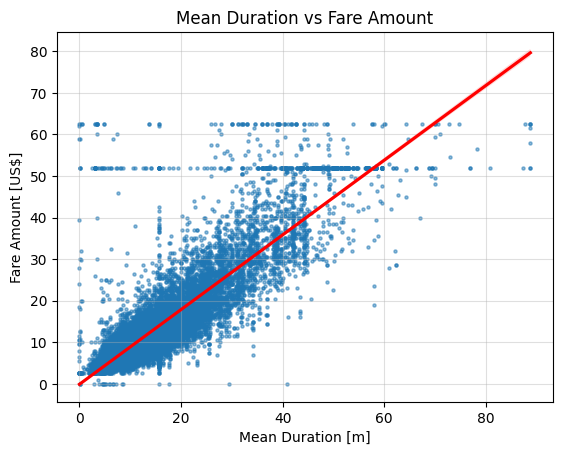

In [36]:
# Create a scatterplot to visualize the relationship between variables of interest
fig = sns.regplot(x=df.mean_duration,
                  y=df.fare_amount,
                  scatter_kws={'alpha':0.5, 's':5},
                  line_kws={'color':'red'})
fig.grid(alpha=0.4)
fig.set_title('Mean Duration vs Fare Amount')
fig.set_xlabel('Mean Duration [m]')
fig.set_ylabel('Fare Amount [US$]')

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [37]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: count, dtype: int64

Examine the first 30 of these trips.

In [38]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df_52 = df[df['fare_amount']==52]

In [39]:
df_52.head(30)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,rush_hour,day,month,duration,mean_duration,passenger_count,trip_distance,mean_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_dropoff
18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,0,sunday,Mar,36.800000,40.500000,2,18.90,19.211667,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,236 132
47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,0,saturday,Jun,66.850000,52.941667,1,18.00,19.229000,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,132 163
95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,0,saturday,Nov,0.966667,3.021839,1,0.23,2.255862,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,132 132
103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,0,wednesday,Dec,29.183333,47.275000,1,18.93,19.431667,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,132 79
80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,0,sunday,Sep,29.483333,49.833333,1,17.99,17.654000,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,132 234
16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,tuesday,Feb,39.833333,58.246032,1,18.40,18.761905,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,132 48
55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,0,monday,Jun,15.616667,15.616667,1,4.73,4.730000,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,228 88
65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,0,thursday,Aug,45.450000,58.246032,2,18.21,18.761905,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,132 48
80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,0,tuesday,Sep,42.850000,42.920000,1,17.27,17.096000,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,186 132
33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,0,sunday,Apr,71.583333,46.340476,6,18.34,17.994286,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,132 148


In [40]:
df_52.PULocationID.value_counts().head()

PULocationID
132    292
264     15
163     13
170     13
233      9
Name: count, dtype: int64

In [41]:
df_52.PULocationID.count()

514

In [42]:
df_52.DOLocationID.value_counts().head()

DOLocationID
132    179
230     32
48      25
162     18
161     15
Name: count, dtype: int64

In [43]:
df_52.DOLocationID.count()

514

In [44]:
df_52.RatecodeID.value_counts().head()

RatecodeID
2    513
1      1
Name: count, dtype: int64

**Question:** What do you notice about the first 30 trips?

It seems that almost all of the trips in the first 30 rows where the fare amount was \$52 either begin or end at location 132, and all of them have a `RatecodeID` of 2.

A deeper analysis reveals that 513 out of 514 trips have a `RatecodeID` of 2. Also, 292 out of 514 (56.8%) `PULocationID` begin at location 132 and 179 out of 514 (34.8%) `DOLocationID` end at location 32, or 471 out of 514 (91.6%) trips start or end at location 132. 

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of $5.76 and \$5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.

The data dictionary says that `RatecodeID` of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for "new york city taxi flat rate \$52" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because `RatecodeID` is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions. This way you know that those data points will always be correct.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [45]:
df2 = df.copy()
df2 = df2.drop(['tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22699 entries, 24870114 to 17208911
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   rush_hour        22699 non-null  int64  
 2   mean_duration    22699 non-null  float64
 3   passenger_count  22699 non-null  int64  
 4   mean_distance    22699 non-null  float64
 5   fare_amount      22699 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.7 MB


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

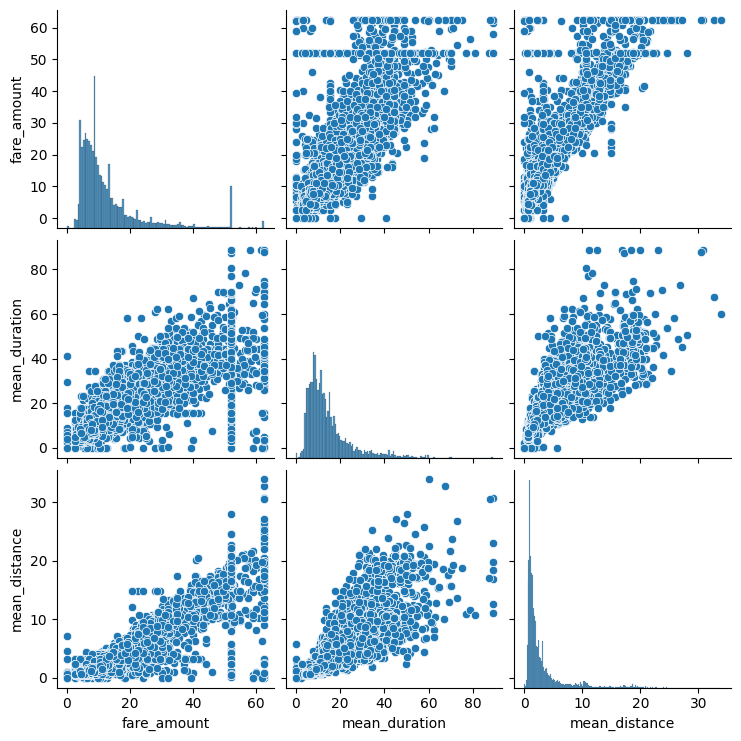

In [46]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df[['fare_amount', 'mean_duration', 'mean_distance']])

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [47]:
# Correlation matrix to help determine most correlated variables
df2.corr(method='pearson')

,VendorID,rush_hour,mean_duration,passenger_count,mean_distance,fare_amount
VendorID,1.000000,-0.002874,0.001876,0.266463,0.004741,0.001045
rush_hour,-0.002874,1.000000,-0.021583,-0.022035,-0.039725,-0.020075
mean_duration,0.001876,-0.021583,1.000000,0.015852,0.874864,0.859105
passenger_count,0.266463,-0.022035,0.015852,1.000000,0.013428,0.014942
mean_distance,0.004741,-0.039725,0.874864,0.013428,1.000000,0.910185
fare_amount,0.001045,-0.020075,0.859105,0.014942,0.910185,1.000000


Visualize a correlation heatmap of the data.

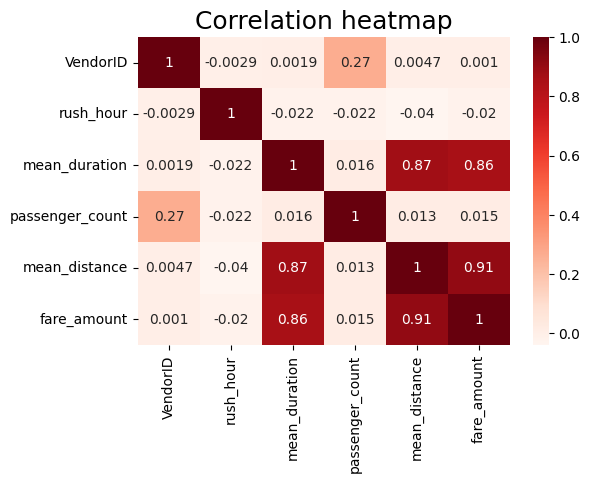

In [48]:
# Create correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

`mean_duration` and `mean_distance` are both highly correlated with the target variable of `fare_amount` They're also both correlated with each other, with a Pearson correlation of 0.87.

Recall that highly correlated predictor variables can be bad for linear regression models when you want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

This model will predict `fare_amount`, which will be used as a predictor variable in machine learning models. Therefore, try modeling with both variables even though they are correlated.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [49]:
X = df2.drop(columns='fare_amount')
y = df2[['fare_amount']]

### Task 8b. Pre-process data


Dummy encode categorical variables

In [50]:
# Convert VendorID to string
X.VendorID = X.VendorID.astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,rush_hour,mean_duration,passenger_count,mean_distance,VendorID_2
24870114,0,22.847222,6,3.521667,True
35634249,0,24.470370,1,3.108889,False
106203690,1,7.250000,1,0.881429,False
38942136,0,30.250000,1,3.700000,True
30841670,0,14.616667,1,4.435000,True


### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [51]:
# Standardize the X variables
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [52]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:

# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_train_scaled

### Fit the model

Instantiate your model and fit it to the training data.

In [54]:
# Fit your model to the training data
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [55]:
# Evaluate the model performance on the training data
lr.score(X_train, y_train)

0.8398434585044773

In [56]:
r_sq = lr.score(X_train, y_train)
print(f'Coefficient of determination: {r_sq:.4f}')
y_pred_train = lr.predict(X_train)

print(f'R^2: {metrics.r2_score(y_train, y_pred_train):.4f}')
print(f'MAE: {metrics.mean_absolute_error(y_train, y_pred_train):.4f}')
print(f'MSE: {metrics.mean_squared_error(y_train, y_pred_train):.4f}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)):.4f}')

Coefficient of determination: 0.8398
R^2: 0.8398
MAE: 2.1867
MSE: 17.8897
RMSE: 4.2296


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [57]:
# Evaluate the model performance on the testing data
r_sq = lr.score(X_test, y_test)
print(f'Coefficient of determination: {r_sq:.4f}')
y_pred_test = lr.predict(X_test)

print(f'R^2: {metrics.r2_score(y_test, y_pred_test):.4f}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred_test):.4f}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred_test):.4f}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)):.4f}')

Coefficient of determination: 0.8683
R^2: 0.8683
MAE: 2.1337
MSE: 14.3265
RMSE: 3.7850


The model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfit. In fact, the test scores were even better than the training scores.

For the test data, an R<sup>2</sup> of 0.868 means that 86.8% of the variance in the `fare_amount` variable is described by the model.

The mean absolute error is informative here because, for the purposes of the model, an error of two is not more than twice as bad as an error of one.

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [58]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
102188254,14.0,12.356503,1.643497
50574134,28.0,16.314595,11.685405
14767643,5.5,6.726789,-1.226789
16019414,15.5,16.227206,-0.727206
1352127,9.5,10.536408,-1.036408


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

Text(0.5, 1.0, 'Actual vs. predicted')

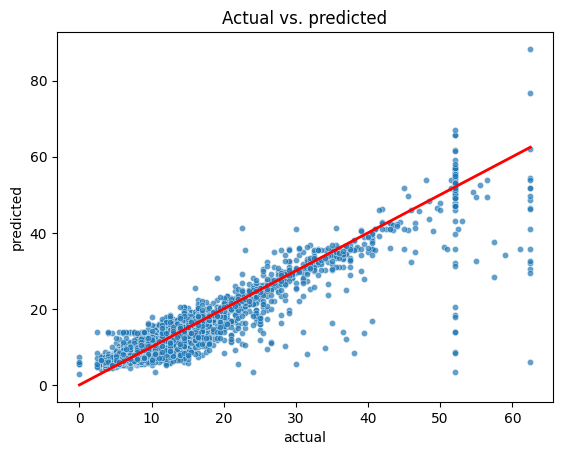

In [60]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.7,
                )
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,results.actual.max()], [0,results.actual.max()], c='red', linewidth=2)
plt.title('Actual vs. predicted')

Visualize the distribution of the `residuals` using a histogram.

Text(0, 0.5, 'Count')

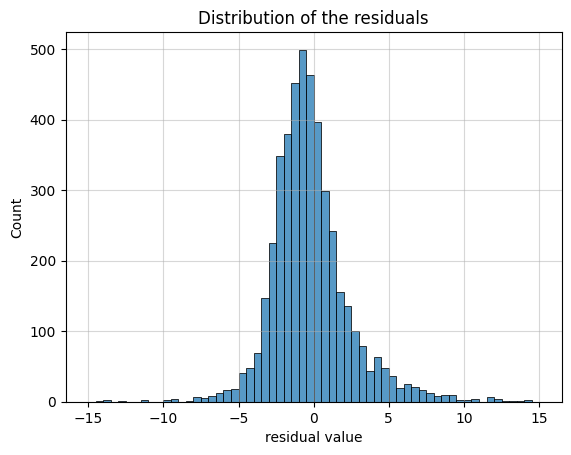

In [66]:
# Visualize the distribution of the `residuals`
sns.histplot(results.residual,
             bins=np.arange(-15,15.5,0.5))
plt.grid(alpha=0.5)
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('Count')

In [67]:
# Calculate residual mean
residual_mean = results.residual.mean()
residual_mean

-0.015442621528680374

The distribution of the residuals is approximately normal and has a mean of -0.015. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

Create a scatterplot of `residuals` over `predicted`.

Text(0, 0.5, 'residual value')

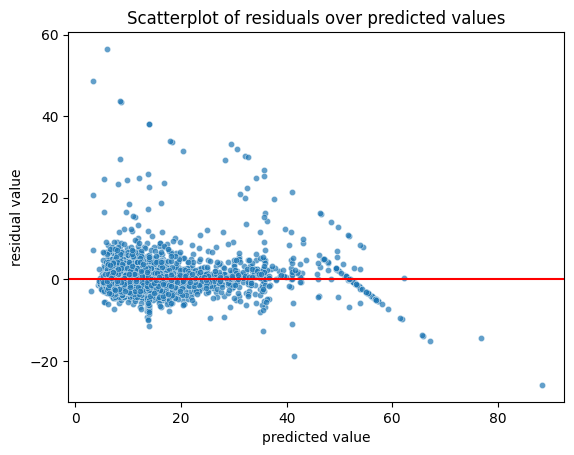

In [70]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x='predicted',
                y='residual',
                data=results,
                s=20,
                alpha=0.7,
                )
# Draw an x=y line to show what the results would be if the model were perfect
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')

The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which you know are the imputed maximum of \$62.50 and the flat rate of \$52 for JFK airport trips.

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [71]:
# Output the model's coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,rush_hour,mean_duration,passenger_count,mean_distance,VendorID_2
0,0.241401,0.278431,0.02393,1.995647,-0.109446


What do these coefficients mean? How should they be interpreted?

The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. Be careful here! A common misinterpretation is that for every mile traveled, the fare amount increases by a mean of \$1.99. This is incorrect. Remember, the data used to train the model was standardized with `StandardScaler()`. As such, the units are no longer miles. In other words, you cannot say "for every mile traveled...", as stated above. The correct interpretation of this coefficient is: controlling for other variables, *for every +1 change in standard deviation*, the fare amount increases by a mean of \$1.99. 

Note also that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

So, translate this back to miles instead of standard deviation (i.e., unscale the data). 

1. Calculate the standard deviation of `mean_distance` in the `X_train` data.

2. Divide the coefficient (1.995647) by the result to yield a more intuitive interpretation.

In [75]:
# 1. Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print(coefficients.loc[0,'mean_distance'] / X_train['mean_distance'].std())

3.574812975256436
0.5582520305361715


### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



**What are the key takeaways from this notebook?**

* Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
* Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
* Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions (or not, depending on your use case).

**What results can be presented from this notebook?**

*  You can discuss meeting linear regression assumptions, and you can present the MAE and RMSE scores obtained from the model.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 